# An example using Feature weighted ECM clustering
## With Seeds dataset  


In [18]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_seeds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Seeds DS: 210 instances, 6 features


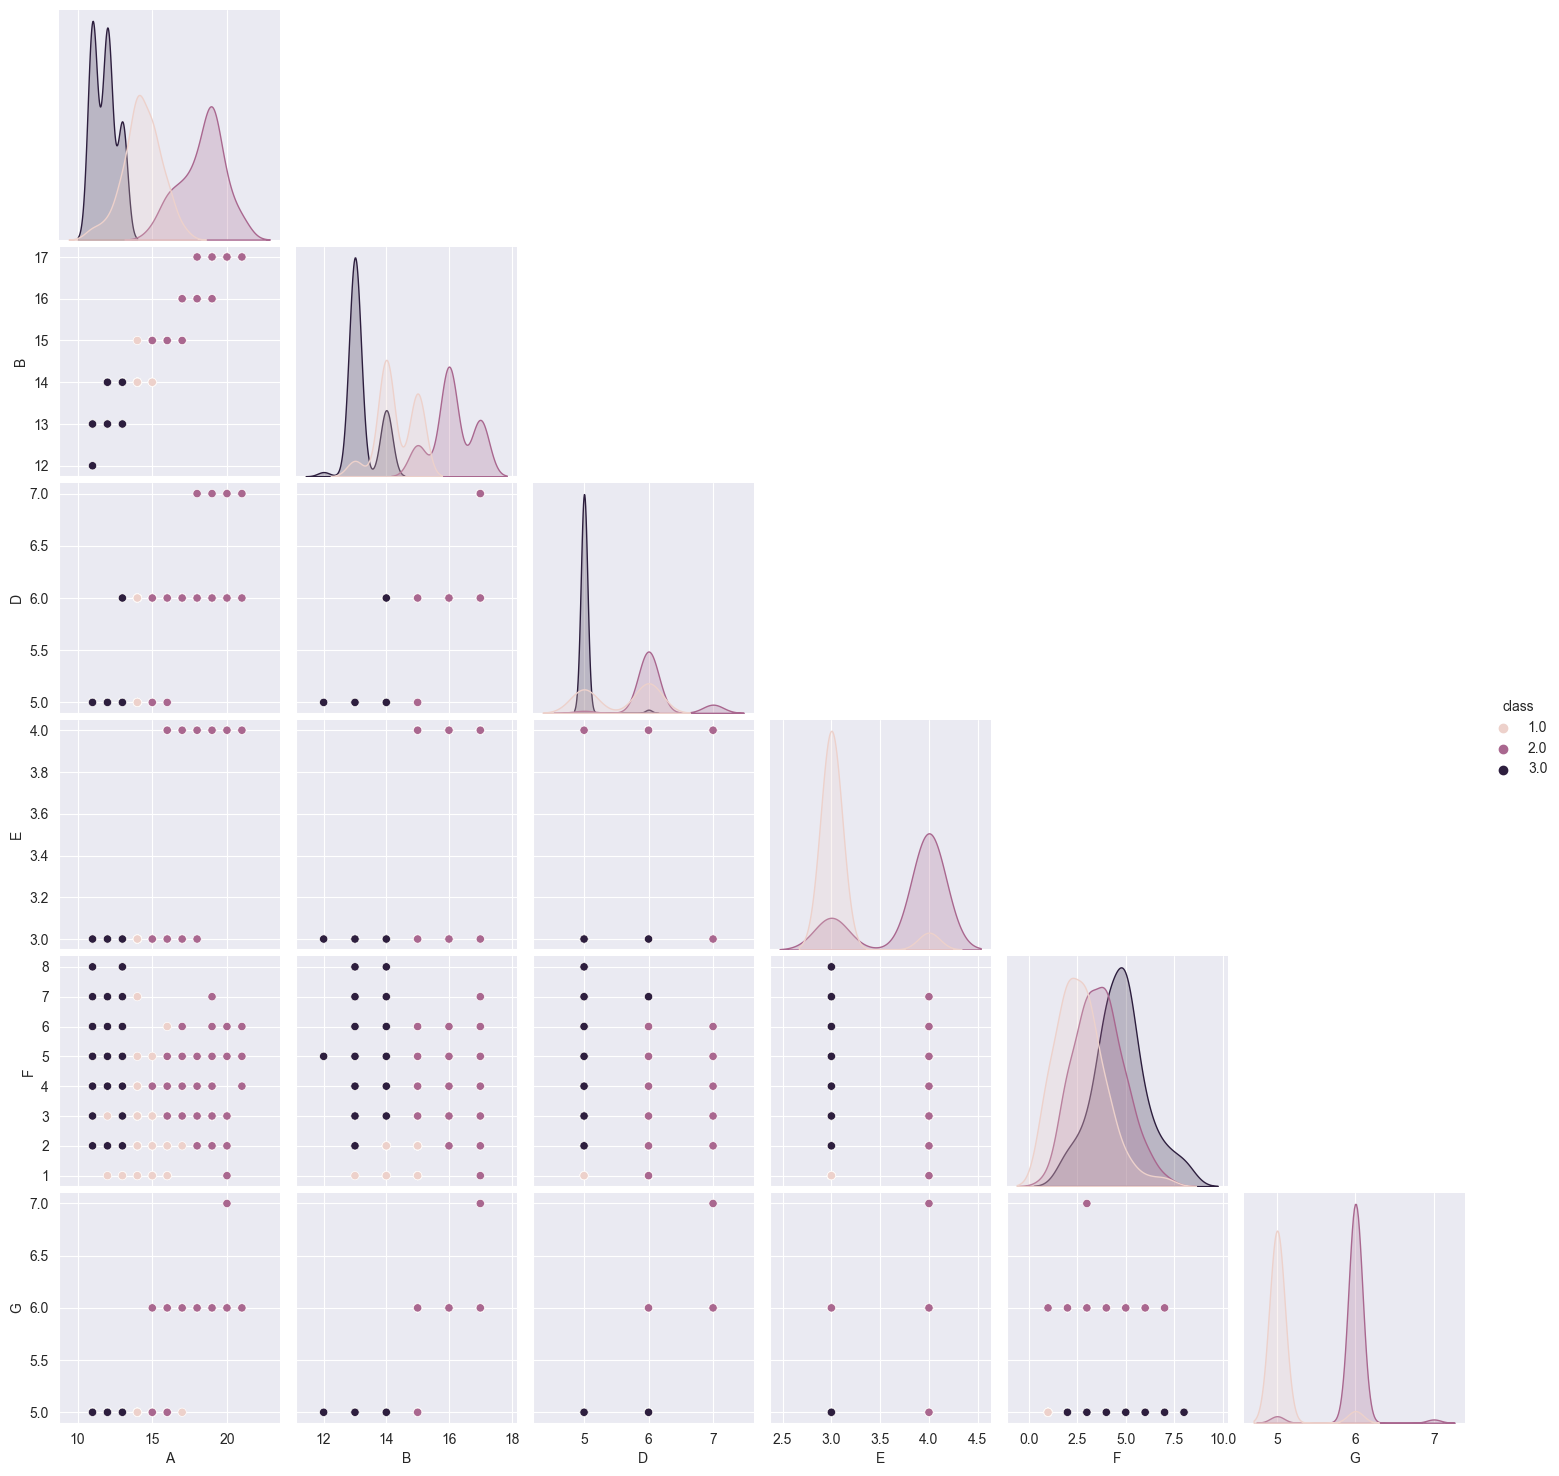

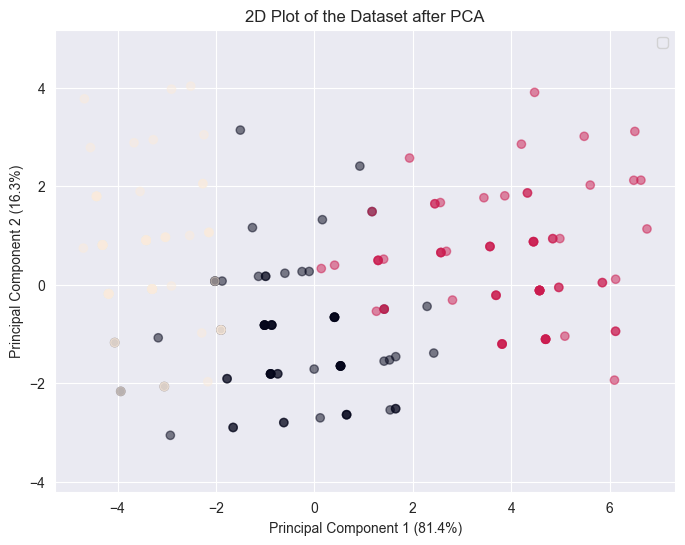

In [19]:
# fetch dataset
df = load_seeds()
df = df.drop(columns=['C'])
# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])

# Scatter matrix plot
sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"Seeds DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Normalization
# scaler = MinMaxScaler((0,1))
# X = pd.DataFrame(scaler.fit_transform(X))

In [20]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 288.7625423323275]
[2, 280.8040432543499]
[3, 279.67865784923646]
[4, 279.36966772239714]
[5, 279.23173329600223]
[6, 279.14874575915]
[7, 279.0901449093685]
[8, 279.0457800540676]
[9, 279.0114156736233]
[10, 278.98472449251227]
[11, 278.9640943387225]
[12, 278.9482644940826]
[13, 278.9362095311495]
[14, 278.9270937855111]
[15, 278.9202437677518]
[16, 278.91512437210434]
[17, 278.91131628132126]
[18, 278.90849492707395]
[19, 278.9064117181058]
[20, 278.9048779461728]
[21, 278.90375142992036]
[22, 278.90292571330235]
[  0.         278.90292571 278.90292571]
[1, 288.7625423323275]
[2, 280.8040432543499]
[3, 279.67865784923646]
[4, 279.36966772239714]
[5, 279.23173329600223]
[6, 279.14874575915]
[7, 279.0901449093685]
[8, 279.0457800540676]
[9, 279.0114156736233]
[10, 278.98472449251227]
[11, 278.9640943387225]
[12, 278.9482644940826]
[13, 278.9362095311495]
[14, 278.9270937855111]
[15, 278.9202437677518]
[16, 278.91512437210434]
[17, 278.91131628132126]
[18, 278.90849492707395]
[19, 

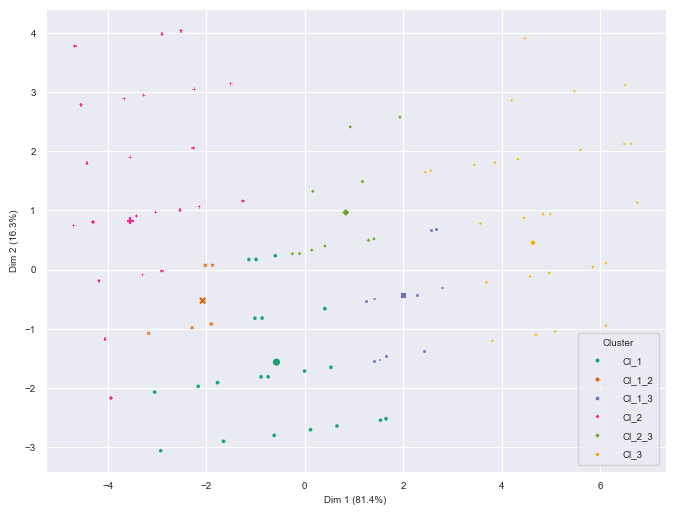

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.6828553072911945
Maximum Non-specificity value: 3.7031263451496104
Minimum Non-specificity value: 0.38234114048316553
Average Non-specificity value: 1.309685793482361


In [21]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=1, delta=100, ntrials=10)

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

In [22]:
# Feature weighted ECM clustering
c = 3
d = X.shape[1]
W = np.ones((c, d)) * (1/d)
model = fwecm(x=X, c=c, W=W, beta=2, alpha=1, delta=100, ntrials=10)

Initial weight matrix: 
 [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
[1, 8.024888436946014]
[2, 1.3744181560099296]
[3, 0.9355011973487914]
[4, 0.8143001358489268]
[5, 0.749351928510834]
[6, 0.6802884727744307]
[7, 0.5949854841431984]
[8, 0.48050190787689306]
[9, 0.3654347943704567]
[10, 0.32175830995472127]
[11, 0.3120322798790015]
[12, 0.30696595678253297]
[13, 0.30320678388720973]
[14, 0.2999695289703449]
[15, 0.2967655575204588]
[16, 0.29337209273527237]
[17, 0.289705895113708]
[18, 0.2857172320458391]
[19, 0.2813556202705012]
[20, 0.27656035463315126]
[21, 0.2712571706986942]
[22, 0.26536091844383203]
[23, 0.2587896042649532]
[24, 0.2514824916730158]
[25, 0.2433822948908211]
[26, 0.2343597833528888]
[27, 0.22414530664471344]
[28, 0.21230490920479736]
[29, 0.1982061186562211]
[30, 0.18096022794597688]
[31, 0.159453881031

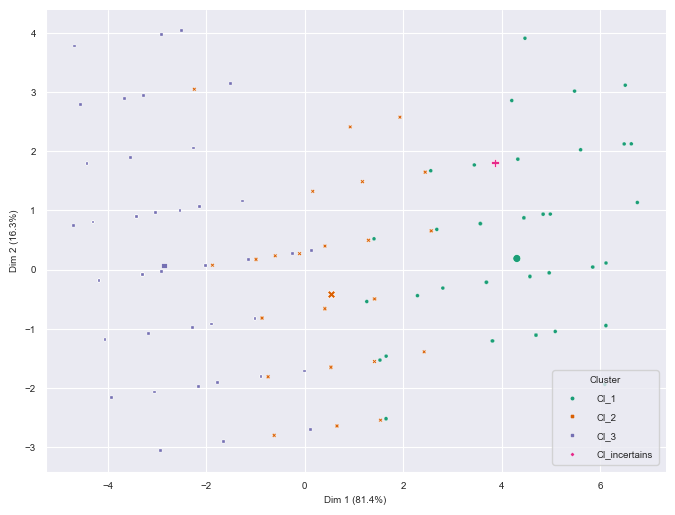

Weight matrix: 
 [[2.83022312e-04 1.19434624e-03 3.14354645e-05 9.97677735e-01
  2.68665346e-04 5.44795735e-04]
 [2.49884073e-04 8.29192231e-04 4.83121201e-01 5.15380424e-01
  1.43954385e-04 2.75345066e-04]
 [6.61329801e-05 2.98065706e-04 2.73668833e-01 2.43647340e-01
  3.63655016e-05 4.82283262e-01]]
Centers: 
 [[18.6533626  16.20260717  9.66837989  3.99955972  3.33473974  6.91102153]
 [15.21454424 14.83997222  6.00069567  2.99868301  3.21416577  6.17090147]
 [12.36320862 13.4394046   5.00028768  2.99644102  4.13763086  5.0000598 ]]
----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.4654336067506884 - J value: 0.03991924105621478
Maximum Non-specificity value: 4.35869866329359
Minimum Non-specificity value: 1.936459394598049e-05
Average Non-specificity value: 0.730306785562976


In [23]:

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
print(f"Centers: \n {model['g']}")
# cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
# cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
# cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
# print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
# print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
# print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")
# 
# W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
# W_COV_1.sort_values('x', inplace=True)
# W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
# W_COV_2.sort_values('x', inplace=True)
# W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
# W_COV_3.sort_values('x', inplace=True)
# 
# plt.clf()
# plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
# plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
# plt.scatter(W_COV_3['x'], W_COV_3['y'], label = "cluster 3", marker='o')
# plt.xlabel("Variance of clusters")
# plt.ylabel("Weight of clusters w.r.t each dimension")
# plt.legend()
# plt.show()

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)